In [323]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('default')
import seaborn as sns
mpl.rc('font', family='Ayuthaya')

In [324]:
df_all = pd.read_csv('tellme_data.csv',index_col=0, parse_dates=['sale_date'])
df_all

<ipython-input-324-5ff2c1036439>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv('tellme_data.csv',index_col=0, parse_dates=['sale_date'])


,shop_code,shop_name,shop_province,sale_date,member_code,birth_year,start_year,member_province,product_code,product_color,product_name_x,quantity,price,category_name,age,value,member_part,shop_part
0,4667,สินทรัพย์ทอง สงขลา,สงขลา,2019-12-04,10066720,1961.0,2011.0,ตรัง,9531,3,Tellme สมูธ แวร์ ลูส เพาเดอร์,2,575.0,แป้งฝุ่น,61,1150.0,S,S
1,4667,สินทรัพย์ทอง สงขลา,สงขลา,2019-12-04,10066720,1961.0,2011.0,ตรัง,9572,21,Tellme บลัชออน รีฟิล ใหญ่,1,250.0,ผลิตภัณฑ์แต่งหน้า,61,250.0,S,S
2,3779,โรบินสัน สกลนคร,สกลนคร,2019-11-19,10076238,1964.0,2013.0,ขอนแก่น,9618P899,7,Tellme สมูธแอสซิลค์ ทูเวย์(รีฟิลพร้อมสปองค์),1,899.0,แป้งทู-เวย์,58,899.0,NW,NW
3,3214,โรบินสัน กาญจนบุรี,กาญจนบุรี,2020-02-17,4121117780,1981.0,2004.0,กาญจนบุรี,9786,,Tellme สมูธแอสซิลค์ ซันโพรเท็คชั่น ครีม,1,1900.0,ครีมกันแดด,41,1900.0,E,E
4,3214,โรบินสัน กาญจนบุรี,กาญจนบุรี,2020-02-17,4121117780,1981.0,2004.0,กาญจนบุรี,9825,120,Tellme ยาทาเล็บ,1,89.0,อื่นๆ,41,89.0,E,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550859,1326,โรบินสัน ศรีนครินทร์,กรุงเทพมหานคร,2019-12-23,1322132255,1947.0,2006.0,กรุงเทพมหานคร,9551N,064,Tellme อายเชโดว์ รีฟิล,1,140.0,ผลิตภัณฑ์แต่งหน้า,75,140.0,C,C
550860,1326,โรบินสัน ศรีนครินทร์,กรุงเทพมหานคร,2019-12-23,1322132255,1947.0,2006.0,กรุงเทพมหานคร,9552,005,Tellme อายเชโดว์ รีฟิล ใหญ่,2,180.0,ผลิตภัณฑ์แต่งหน้า,75,360.0,C,C
550861,4667,สินทรัพย์ทอง สงขลา,สงขลา,2019-12-04,4663114055,1964.0,2004.0,สงขลา,6517,3,Tellme ยูวีไวท์ฯ ทูเวย์(รีฟิลพร้อมสปองค์),2,900.0,แป้งทู-เวย์,58,1800.0,S,S
550862,3094,มาร์คโฟร์ แพร่,แพร่,2019-11-25,3094115280,1962.0,2004.0,แพร่,9381,S14,Tellme สมูธแอสซิลค์ ลิปสติก,1,535.0,ลิปสติก,60,535.0,N,N


In [325]:
df_all['member_year'] = 2022 - df_all['start_year'].astype(int)
df_all.head()

,shop_code,shop_name,shop_province,sale_date,member_code,birth_year,start_year,member_province,product_code,product_color,product_name_x,quantity,price,category_name,age,value,member_part,shop_part,member_year
0,4667,สินทรัพย์ทอง สงขลา,สงขลา,2019-12-04,10066720,1961.0,2011.0,ตรัง,9531,3,Tellme สมูธ แวร์ ลูส เพาเดอร์,2,575.0,แป้งฝุ่น,61,1150.0,S,S,11
1,4667,สินทรัพย์ทอง สงขลา,สงขลา,2019-12-04,10066720,1961.0,2011.0,ตรัง,9572,21,Tellme บลัชออน รีฟิล ใหญ่,1,250.0,ผลิตภัณฑ์แต่งหน้า,61,250.0,S,S,11
2,3779,โรบินสัน สกลนคร,สกลนคร,2019-11-19,10076238,1964.0,2013.0,ขอนแก่น,9618P899,7,Tellme สมูธแอสซิลค์ ทูเวย์(รีฟิลพร้อมสปองค์),1,899.0,แป้งทู-เวย์,58,899.0,NW,NW,9
3,3214,โรบินสัน กาญจนบุรี,กาญจนบุรี,2020-02-17,4121117780,1981.0,2004.0,กาญจนบุรี,9786,,Tellme สมูธแอสซิลค์ ซันโพรเท็คชั่น ครีม,1,1900.0,ครีมกันแดด,41,1900.0,E,E,18
4,3214,โรบินสัน กาญจนบุรี,กาญจนบุรี,2020-02-17,4121117780,1981.0,2004.0,กาญจนบุรี,9825,120,Tellme ยาทาเล็บ,1,89.0,อื่นๆ,41,89.0,E,E,18


In [326]:
df_all = df_all[df_all['age']<100]
df_all['sale_month'] = df_all['sale_date'].dt.to_period("M")
df_all['sale_year'] = df_all['sale_date'].dt.to_period("Y")
df_all.head()

<ipython-input-326-f6c79141b049>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['sale_month'] = df_all['sale_date'].dt.to_period("M")
<ipython-input-326-f6c79141b049>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['sale_year'] = df_all['sale_date'].dt.to_period("Y")


,shop_code,shop_name,shop_province,sale_date,member_code,birth_year,start_year,member_province,product_code,product_color,...,quantity,price,category_name,age,value,member_part,shop_part,member_year,sale_month,sale_year
0,4667,สินทรัพย์ทอง สงขลา,สงขลา,2019-12-04,10066720,1961.0,2011.0,ตรัง,9531,3,...,2,575.0,แป้งฝุ่น,61,1150.0,S,S,11,2019-12,2019
1,4667,สินทรัพย์ทอง สงขลา,สงขลา,2019-12-04,10066720,1961.0,2011.0,ตรัง,9572,21,...,1,250.0,ผลิตภัณฑ์แต่งหน้า,61,250.0,S,S,11,2019-12,2019
2,3779,โรบินสัน สกลนคร,สกลนคร,2019-11-19,10076238,1964.0,2013.0,ขอนแก่น,9618P899,7,...,1,899.0,แป้งทู-เวย์,58,899.0,NW,NW,9,2019-11,2019
3,3214,โรบินสัน กาญจนบุรี,กาญจนบุรี,2020-02-17,4121117780,1981.0,2004.0,กาญจนบุรี,9786,,...,1,1900.0,ครีมกันแดด,41,1900.0,E,E,18,2020-02,2020
4,3214,โรบินสัน กาญจนบุรี,กาญจนบุรี,2020-02-17,4121117780,1981.0,2004.0,กาญจนบุรี,9825,120,...,1,89.0,อื่นๆ,41,89.0,E,E,18,2020-02,2020


In [327]:
df_all.drop(['shop_code','shop_name','shop_province','birth_year','start_year','member_province'], axis=1, inplace=True)
df_all.head()

<ipython-input-327-f4277920ffea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all.drop(['shop_code','shop_name','shop_province','birth_year','start_year','member_province'], axis=1, inplace=True)


,sale_date,member_code,product_code,product_color,product_name_x,quantity,price,category_name,age,value,member_part,shop_part,member_year,sale_month,sale_year
0,2019-12-04,10066720,9531,3,Tellme สมูธ แวร์ ลูส เพาเดอร์,2,575.0,แป้งฝุ่น,61,1150.0,S,S,11,2019-12,2019
1,2019-12-04,10066720,9572,21,Tellme บลัชออน รีฟิล ใหญ่,1,250.0,ผลิตภัณฑ์แต่งหน้า,61,250.0,S,S,11,2019-12,2019
2,2019-11-19,10076238,9618P899,7,Tellme สมูธแอสซิลค์ ทูเวย์(รีฟิลพร้อมสปองค์),1,899.0,แป้งทู-เวย์,58,899.0,NW,NW,9,2019-11,2019
3,2020-02-17,4121117780,9786,,Tellme สมูธแอสซิลค์ ซันโพรเท็คชั่น ครีม,1,1900.0,ครีมกันแดด,41,1900.0,E,E,18,2020-02,2020
4,2020-02-17,4121117780,9825,120,Tellme ยาทาเล็บ,1,89.0,อื่นๆ,41,89.0,E,E,18,2020-02,2020


In [328]:
value_per_year = df_all.groupby(['member_code','sale_year'],as_index=False)['value'].sum()
print(value_per_year.head())
valuecut = value_per_year['value'].quantile(0.995)
print('Value_outlier',valuecut)
value_per_year = value_per_year[value_per_year['value'] > valuecut]
member_outlier_value = value_per_year['member_code'].unique()


   member_code sale_year   value
0     10000610      2021  6908.0
1     10000612      2018  1690.0
2     10000612      2019  5160.0
3     10000612      2021  7899.0
4     10000612      2022  2738.0
Value_outlier 75631.6599999999


In [329]:
quantity_per_transaction = df_all.groupby(['member_code','sale_year'],as_index=False)['quantity'].sum()
print(quantity_per_transaction.head())
valuecut = quantity_per_transaction['quantity'].quantile(0.995)
print('Quantity_outlier',valuecut)
quantity_per_transaction = quantity_per_transaction[quantity_per_transaction['quantity'] > valuecut]
member_outlier_quan = quantity_per_transaction['member_code'].unique()

   member_code sale_year  quantity
0     10000610      2021        22
1     10000612      2018         1
2     10000612      2019         4
3     10000612      2021        10
4     10000612      2022         5
Quantity_outlier 100.0


In [330]:

outlier = set(member_outlier_value).intersection(set(member_outlier_quan))

df_all['Status'] = np.where(df_all['member_code'].isin(member_outlier_value), 'Value','Normal')
df_all['Status'] = np.where(df_all['member_code'].isin(member_outlier_quan), 'Quan', df_all['Status'])
df_all['Status'] = np.where(df_all['member_code'].isin(outlier), 'Both', df_all['Status'])
# print(df_all['Status'].sum())
# df_all['Status'] = df_all['Status'].astype(int)
df_all.head()

<ipython-input-330-6ed5d1104896>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['Status'] = np.where(df_all['member_code'].isin(member_outlier_value), 'Value','Normal')
<ipython-input-330-6ed5d1104896>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['Status'] = np.where(df_all['member_code'].isin(member_outlier_quan), 'Quan', df_all['Status'])
<ipython-input-330-6ed5d1104896>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,sale_date,member_code,product_code,product_color,product_name_x,quantity,price,category_name,age,value,member_part,shop_part,member_year,sale_month,sale_year,Status
0,2019-12-04,10066720,9531,3,Tellme สมูธ แวร์ ลูส เพาเดอร์,2,575.0,แป้งฝุ่น,61,1150.0,S,S,11,2019-12,2019,Normal
1,2019-12-04,10066720,9572,21,Tellme บลัชออน รีฟิล ใหญ่,1,250.0,ผลิตภัณฑ์แต่งหน้า,61,250.0,S,S,11,2019-12,2019,Normal
2,2019-11-19,10076238,9618P899,7,Tellme สมูธแอสซิลค์ ทูเวย์(รีฟิลพร้อมสปองค์),1,899.0,แป้งทู-เวย์,58,899.0,NW,NW,9,2019-11,2019,Normal
3,2020-02-17,4121117780,9786,,Tellme สมูธแอสซิลค์ ซันโพรเท็คชั่น ครีม,1,1900.0,ครีมกันแดด,41,1900.0,E,E,18,2020-02,2020,Normal
4,2020-02-17,4121117780,9825,120,Tellme ยาทาเล็บ,1,89.0,อื่นๆ,41,89.0,E,E,18,2020-02,2020,Normal


In [331]:
df_all['Status'].value_counts()

Normal    497406
Quan       19827
Both       18715
Value      14142
Name: Status, dtype: int64

In [332]:
scat = df_all.groupby(['member_code'], as_index=False)['value','quantity'].sum()
# scat['Status'] = scat.index.isin(outlier).astype(int)
scat['Status'] = np.where(scat['member_code'].isin(member_outlier_value), 'Value','Normal')
scat['Status'] = np.where(scat['member_code'].isin(member_outlier_quan), 'Quan', scat['Status'])
scat['Status'] = np.where(scat['member_code'].isin(outlier), 'Both', scat['Status'])
scat.head()

<ipython-input-332-74029e097b44>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  scat = df_all.groupby(['member_code'], as_index=False)['value','quantity'].sum()


,member_code,value,quantity,Status
0,10000610,6908.00,22,Normal
1,10000612,17487.00,20,Normal
2,10000614,7221.00,6,Normal
3,10000646,14143.00,45,Normal
4,10000648,172482.75,204,Normal


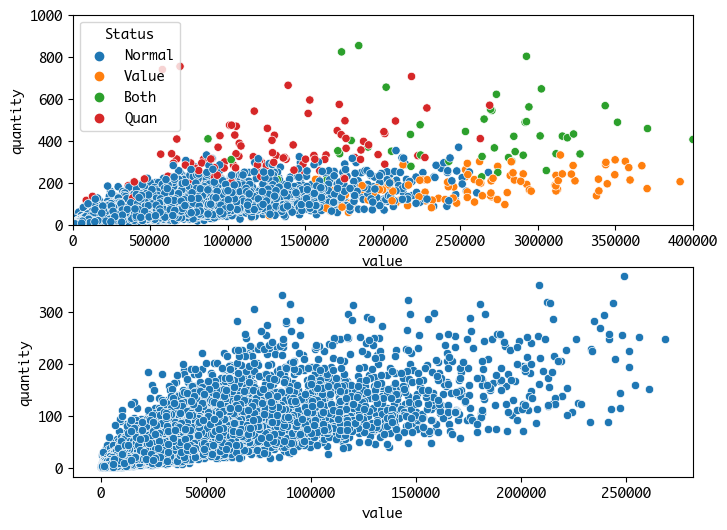

In [333]:
plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
sns.scatterplot(data=scat, x='value',y='quantity', hue='Status')
plt.xlim(0,400000)
plt.ylim(0,1000)

plt.subplot(2,1,2)
sns.scatterplot(data=scat[scat['Status']=='Normal'], x='value',y='quantity')
plt.show()


In [334]:
df_filter = df_all[df_all['Status']=='Normal'].copy()
df_filter

,sale_date,member_code,product_code,product_color,product_name_x,quantity,price,category_name,age,value,member_part,shop_part,member_year,sale_month,sale_year,Status
0,2019-12-04,10066720,9531,3,Tellme สมูธ แวร์ ลูส เพาเดอร์,2,575.0,แป้งฝุ่น,61,1150.0,S,S,11,2019-12,2019,Normal
1,2019-12-04,10066720,9572,21,Tellme บลัชออน รีฟิล ใหญ่,1,250.0,ผลิตภัณฑ์แต่งหน้า,61,250.0,S,S,11,2019-12,2019,Normal
2,2019-11-19,10076238,9618P899,7,Tellme สมูธแอสซิลค์ ทูเวย์(รีฟิลพร้อมสปองค์),1,899.0,แป้งทู-เวย์,58,899.0,NW,NW,9,2019-11,2019,Normal
3,2020-02-17,4121117780,9786,,Tellme สมูธแอสซิลค์ ซันโพรเท็คชั่น ครีม,1,1900.0,ครีมกันแดด,41,1900.0,E,E,18,2020-02,2020,Normal
4,2020-02-17,4121117780,9825,120,Tellme ยาทาเล็บ,1,89.0,อื่นๆ,41,89.0,E,E,18,2020-02,2020,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550859,2019-12-23,1322132255,9551N,064,Tellme อายเชโดว์ รีฟิล,1,140.0,ผลิตภัณฑ์แต่งหน้า,75,140.0,C,C,16,2019-12,2019,Normal
550860,2019-12-23,1322132255,9552,005,Tellme อายเชโดว์ รีฟิล ใหญ่,2,180.0,ผลิตภัณฑ์แต่งหน้า,75,360.0,C,C,16,2019-12,2019,Normal
550861,2019-12-04,4663114055,6517,3,Tellme ยูวีไวท์ฯ ทูเวย์(รีฟิลพร้อมสปองค์),2,900.0,แป้งทู-เวย์,58,1800.0,S,S,18,2019-12,2019,Normal
550862,2019-11-25,3094115280,9381,S14,Tellme สมูธแอสซิลค์ ลิปสติก,1,535.0,ลิปสติก,60,535.0,N,N,18,2019-11,2019,Normal


In [335]:
df_filter.to_csv('df_filter.csv')

In [336]:
covid = pd.read_csv('time_series_covid19_confirmed_global.csv')
covid

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/16/22,9/17/22,9/18/22,9/19/22,9/20/22,9/21/22,9/22/22,9/23/22,9/24/22,9/25/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,196992,197066,197240,197434,197608,197788,198023,198163,198244,198416
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,331459,331540,331583,331601,331715,331810,331861,331908,331953,331976
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,270599,270606,270609,270612,270612,270619,270625,270631,270637,270641
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,46147,46147,46147,46147,46147,46147,46147,46147,46147,46147
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,103131,103131,103131,103131,103131,103131,103131,103131,103131,103131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,702768,702768,702768,702768,702768,702768,702768,702768,702768,702768
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11932,11932,11932,11932,11932,11932,11934,11934,11935,11935
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,333363,333375,333382,333387,333387,333439,333439,333439,333439,333439


In [337]:
infected_covid = covid[covid['Country/Region']=='Thailand'].T[4:].reset_index()
# infected_covid = infected_covid[''].astype('datetime')
infected_covid['date'] = pd.to_datetime(infected_covid['index'])
infected_covid.set_index('date', inplace=True)
infected_covid.drop('index',axis=1,inplace=True)
infected_covid.columns = ['Infected']
infected_covid['Infected'] = infected_covid['Infected'].diff()
infected_covid.dropna(inplace=True)
infected_covid

,Infected
date,
2020-01-23,0
2020-01-24,1
2020-01-25,1
2020-01-26,2
2020-01-27,0
...,...
2022-09-21,0
2022-09-22,1558
2022-09-23,607


In [338]:
sum_value = df_filter.groupby('sale_date')['value'].sum().rolling('60D').mean().to_frame('Total')
sum_value = sum_value.merge(infected_covid, how='left', left_index=True, right_index=True)
sum_value['Infected'] = sum_value['Infected'].rolling('7D').mean()
sum_value

,Total,Infected
sale_date,,
2018-01-01,286214.000000,NaN
2018-01-02,308530.500000,NaN
2018-01-03,286839.000000,NaN
2018-01-04,279192.750000,NaN
2018-01-05,264329.800000,NaN
...,...,...
2022-02-20,223488.100000,16998.285714
2022-02-21,219563.050000,17567.285714
2022-02-22,214475.516667,18137.285714


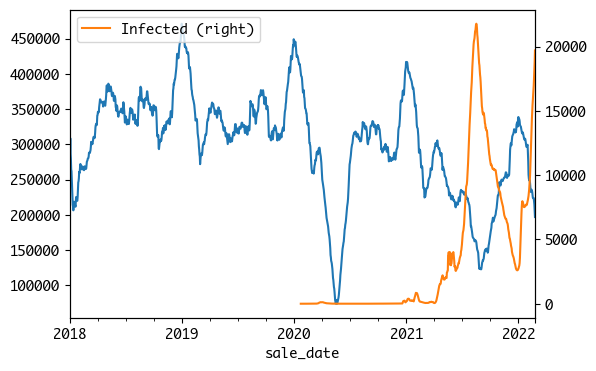

In [339]:
plt.figure(figsize=(6,4))
sum_value['Total'].plot()
sum_value['Infected'].plot(secondary_y = True)
plt.legend()

Cohort Analysis

In [340]:
def find_cohort_index(df):
    cohort_year = int(df['cohort_month'].year)
    cohort_month = int(df['cohort_month'].month)
    sale_year = int(df['sale_year'].year)
    sale_month = int(df['sale_month'].month)

    cohort_index = 12*(sale_year-cohort_year)+(sale_month-cohort_month) +1
    return cohort_index

def add_cohort(df):
    df['cohort_month'] = df.groupby(['member_code'])['sale_month'].transform('min')
    df['cohort_index'] = df.apply(find_cohort_index,axis=1)
    return df

def heatmap_retention(df):
    df = add_cohort(df)
    cohort = df.groupby(['cohort_month','cohort_index'], as_index=False)['member_code'].nunique()
    cohort = cohort.pivot(index='cohort_month',columns='cohort_index',values='member_code')
    cohort_sizes = cohort.iloc[:,0]
    retention = cohort.divide(cohort_sizes, axis=0).round(3)*100
    # retention.iloc[:,0] = cohort.iloc[:,0]

    plt.figure(figsize=(14,12))
    plt.title('Retention Rate %')
    sns.heatmap(data=retention,
    annot=True,
    fmt='.0f',
    vmin=0,
    vmax=50
    ,cmap='BuGn')
    return retention

def heatmap_retention_value(df):
    df = add_cohort(df)
    cohort = df.groupby(['cohort_month','cohort_index'], as_index=False)['value'].sum()
    cohort = cohort.pivot(index='cohort_month',columns='cohort_index',values='value')
    cohort_sizes = cohort.iloc[:,0]
    retention = cohort.divide(cohort_sizes, axis=0).round(3)*100
    retention.iloc[:,0] = cohort.iloc[:,0]

    plt.figure(figsize=(14,12))
    plt.title('Retention Rate %')
    sns.heatmap(data=retention,
    annot=True,
    fmt='.0f',
    vmin=0,
    vmax=50
    ,cmap='BuGn')
    return retention



In [341]:
df_201819 = df_filter[df_filter['sale_year']<'2020'].copy()
df_201819

,sale_date,member_code,product_code,product_color,product_name_x,quantity,price,category_name,age,value,member_part,shop_part,member_year,sale_month,sale_year,Status
0,2019-12-04,10066720,9531,3,Tellme สมูธ แวร์ ลูส เพาเดอร์,2,575.0,แป้งฝุ่น,61,1150.0,S,S,11,2019-12,2019,Normal
1,2019-12-04,10066720,9572,21,Tellme บลัชออน รีฟิล ใหญ่,1,250.0,ผลิตภัณฑ์แต่งหน้า,61,250.0,S,S,11,2019-12,2019,Normal
2,2019-11-19,10076238,9618P899,7,Tellme สมูธแอสซิลค์ ทูเวย์(รีฟิลพร้อมสปองค์),1,899.0,แป้งทู-เวย์,58,899.0,NW,NW,9,2019-11,2019,Normal
19,2019-11-24,10075178,9618,7,Tellme สมูธแอสซิลค์ ทูเวย์(รีฟิลพร้อมสปองค์),1,1450.0,แป้งทู-เวย์,64,1450.0,S,S,10,2019-11,2019,Normal
20,2019-11-24,10075178,9618P899,7,Tellme สมูธแอสซิลค์ ทูเวย์(รีฟิลพร้อมสปองค์),1,899.0,แป้งทู-เวย์,64,899.0,S,S,10,2019-11,2019,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550859,2019-12-23,1322132255,9551N,064,Tellme อายเชโดว์ รีฟิล,1,140.0,ผลิตภัณฑ์แต่งหน้า,75,140.0,C,C,16,2019-12,2019,Normal
550860,2019-12-23,1322132255,9552,005,Tellme อายเชโดว์ รีฟิล ใหญ่,2,180.0,ผลิตภัณฑ์แต่งหน้า,75,360.0,C,C,16,2019-12,2019,Normal
550861,2019-12-04,4663114055,6517,3,Tellme ยูวีไวท์ฯ ทูเวย์(รีฟิลพร้อมสปองค์),2,900.0,แป้งทู-เวย์,58,1800.0,S,S,18,2019-12,2019,Normal
550862,2019-11-25,3094115280,9381,S14,Tellme สมูธแอสซิลค์ ลิปสติก,1,535.0,ลิปสติก,60,535.0,N,N,18,2019-11,2019,Normal


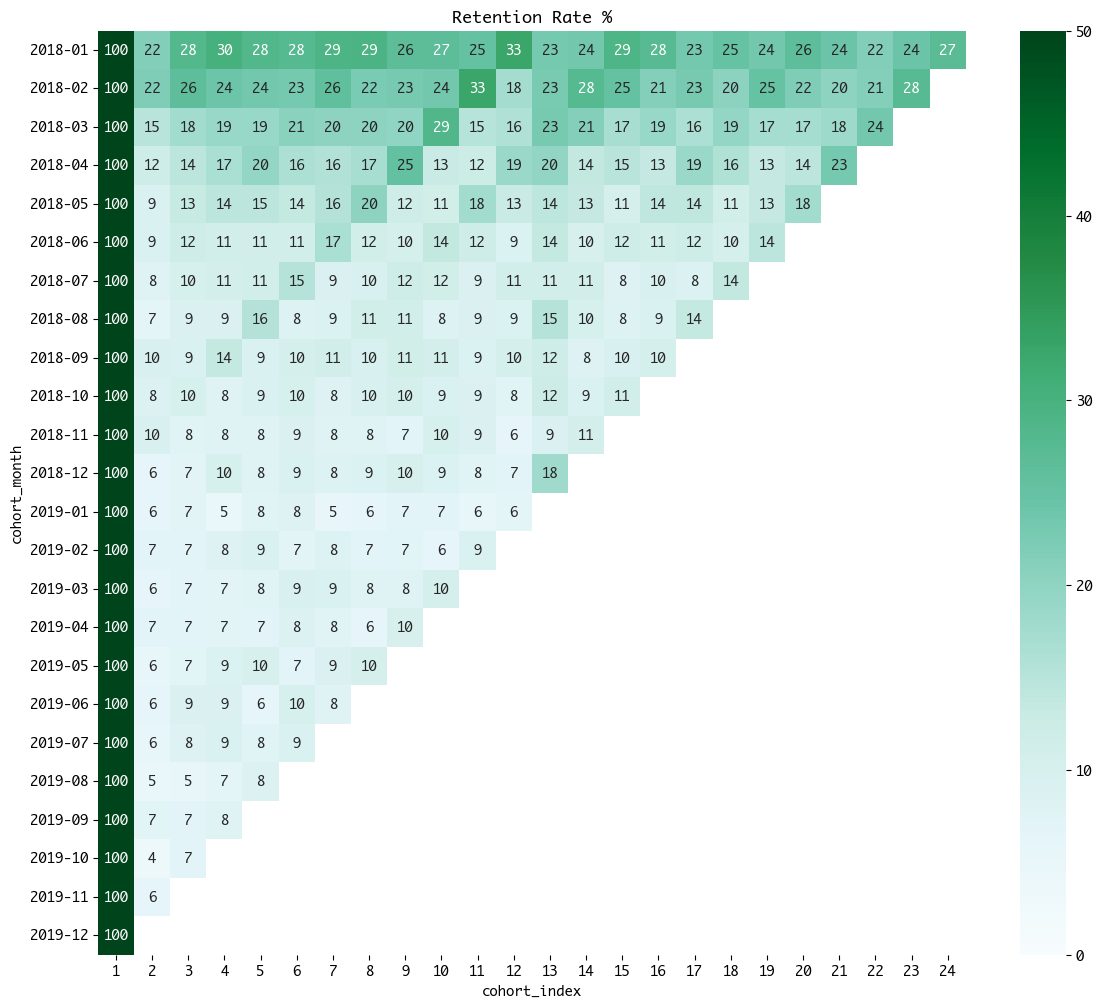

In [342]:
retention_pivot_1819 = heatmap_retention(df_201819)

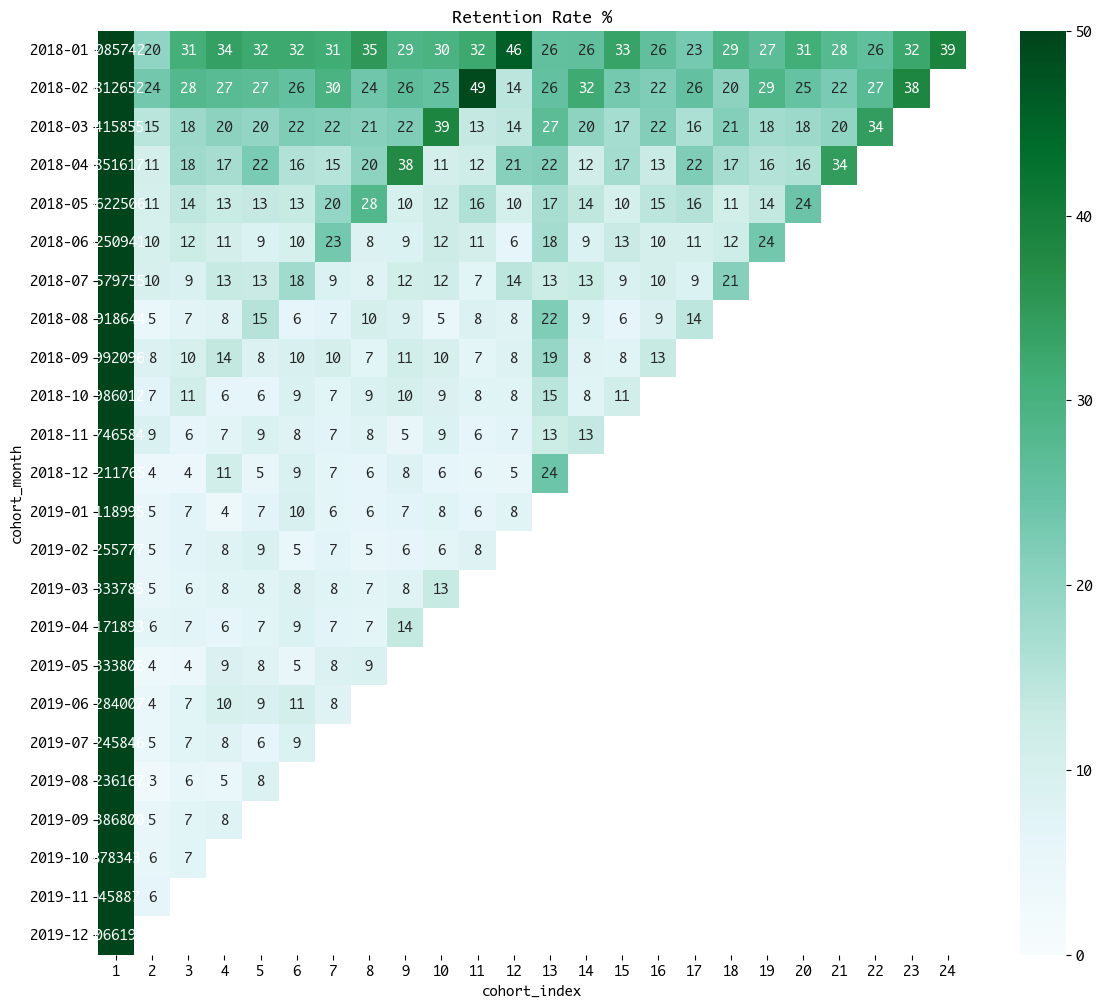

In [343]:
retention_value = heatmap_retention_value(df_201819)

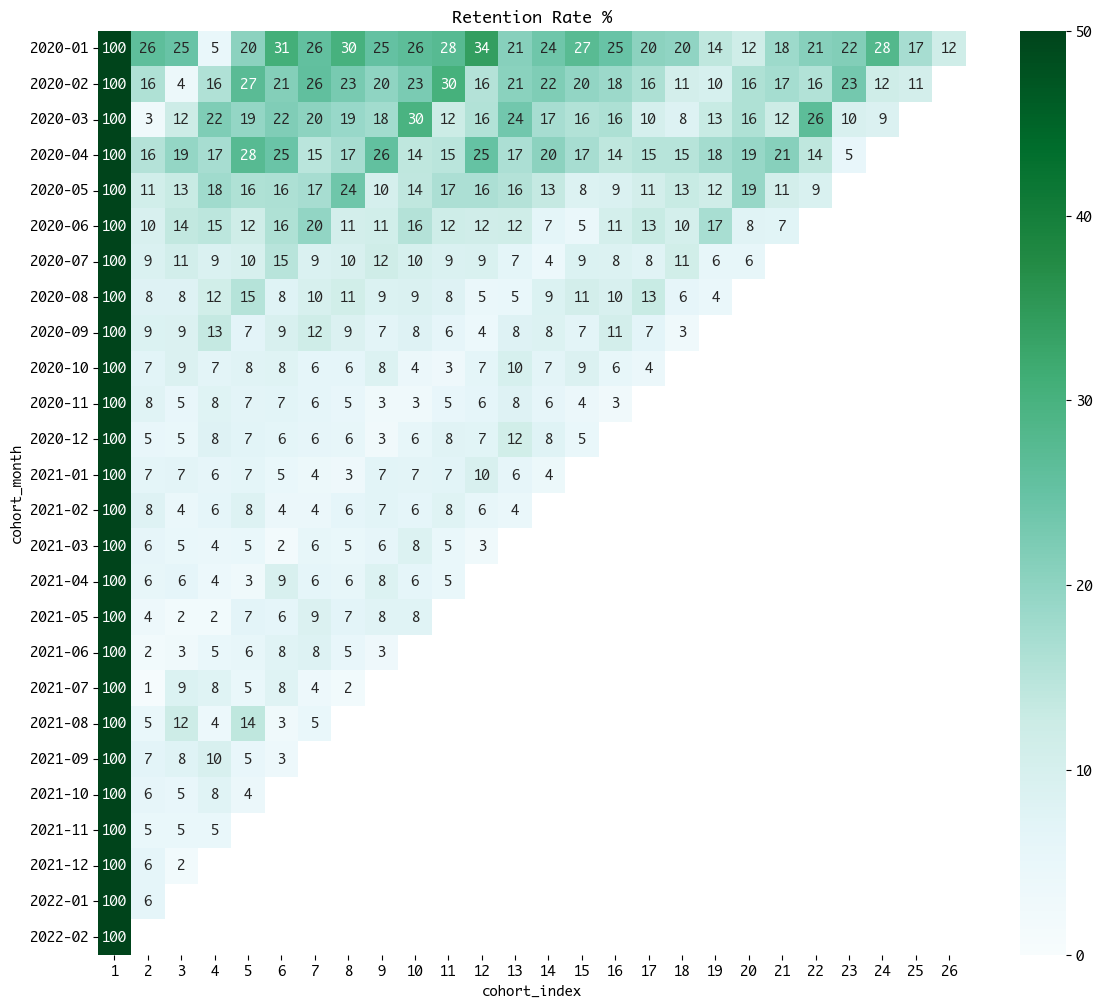

In [344]:
df_202122 =  df_filter[df_filter['sale_year']>='2020'].copy()
retention_pivot_2122 = heatmap_retention(df_202122)

Assume member that perchase within 6 months of cohort_month (first 6 rows). For ex in Cohort Dataframe 2018-2019, the loyal customer will comeback before june 2018.

then we will focus on the loyal customer and analysis since 2018-2019 before covid-19 to see normal behiavor of loyal customer.

In [345]:
cus_1819 = add_cohort(df_201819)
cus_1819 = cus_1819[cus_1819['cohort_month']<'2018-07'].copy()
cus_1819['n_nunique'] = cus_1819.groupby(['member_code'])['cohort_index'].transform('nunique')
cus_1819['loyal'] = np.where(cus_1819['n_nunique']>=4,1,0)
loyal_cus_1819 = cus_1819[cus_1819['loyal']==1].copy()
loyal_cus_1819

,sale_date,member_code,product_code,product_color,product_name_x,quantity,price,category_name,age,value,member_part,shop_part,member_year,sale_month,sale_year,Status,cohort_month,cohort_index,n_nunique,loyal
19,2019-11-24,10075178,9618,7,Tellme สมูธแอสซิลค์ ทูเวย์(รีฟิลพร้อมสปองค์),1,1450.0,แป้งทู-เวย์,64,1450.0,S,S,10,2019-11,2019,Normal,2018-02,22,4,1
20,2019-11-24,10075178,9618P899,7,Tellme สมูธแอสซิลค์ ทูเวย์(รีฟิลพร้อมสปองค์),1,899.0,แป้งทู-เวย์,64,899.0,S,S,10,2019-11,2019,Normal,2018-02,22,4,1
21,2019-11-22,3008106804,1134,,Tellme มอยส์เจอร์แบงค์ เซพารา โลชั่น,1,1590.0,โลชั่น,67,1590.0,N,N,19,2019-11,2019,Normal,2018-01,23,5,1
22,2019-11-22,3008106804,4001,,COVER ART คลีนพัฟ,1,105.0,อื่นๆ,67,105.0,N,N,19,2019-11,2019,Normal,2018-01,23,5,1
23,2019-11-22,3008106804,9006,,Tellme โคลาเกน วิท เอสเซ้นซ์ ออฟ ซิลค์,1,3810.0,ครีมบำรุง,67,3810.0,N,N,19,2019-11,2019,Normal,2018-01,23,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550853,2019-12-10,10089799,8410,,Tellme เคล็นซิ่ง ครีม,2,890.0,ทำความสะอาดผิว,60,1780.0,N,C,6,2019-12,2019,Normal,2018-02,23,9,1
550854,2019-12-10,10089799,9082,,Tellme เพิร์ล เอสเซ้นซ์ โฟมมิ่ง เคล็นเซอร์,1,1200.0,ทำความสะอาดผิว,60,1200.0,N,C,6,2019-12,2019,Normal,2018-02,23,9,1
550855,2019-12-10,10089799,9272,,Tellme เอสเซ้นซ์ เบส เฟิร์มมิ่ง,1,2800.0,ครีมบำรุง,60,2800.0,N,C,6,2019-12,2019,Normal,2018-02,23,9,1
550862,2019-11-25,3094115280,9381,S14,Tellme สมูธแอสซิลค์ ลิปสติก,1,535.0,ลิปสติก,60,535.0,N,N,18,2019-11,2019,Normal,2018-04,20,10,1


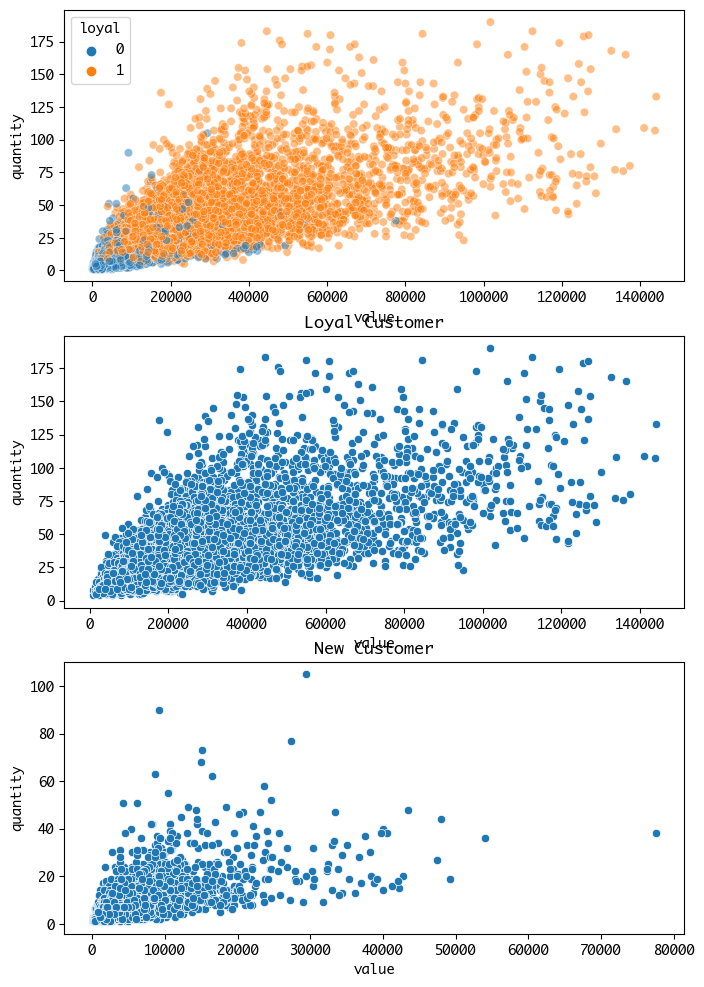

In [346]:
cus_1819_scat = cus_1819.groupby(['member_code'],as_index=False).agg({
    'value':'sum',
    'quantity':'sum',
    'cohort_index':'nunique'})
cus_1819_scat['loyal'] = np.where(cus_1819_scat['cohort_index']>=4,1,0)

plt.figure(figsize=(8,12))

plt.subplot(3,1,1)
sns.scatterplot(data=cus_1819_scat, x='value',y='quantity', hue='loyal',alpha=0.5)

plt.subplot(3,1,2)
plt.title('Loyal Customer')
sns.scatterplot(data=cus_1819_scat[cus_1819_scat['loyal']==1], x='value',y='quantity')

plt.subplot(3,1,3)
plt.title('New Customer')
sns.scatterplot(data=cus_1819_scat[cus_1819_scat['loyal']==0], x='value',y='quantity')
plt.show()

In [347]:
print('Number of loyal customer',loyal_cus_1819['member_code'].nunique())

Number of loyal customer 6531


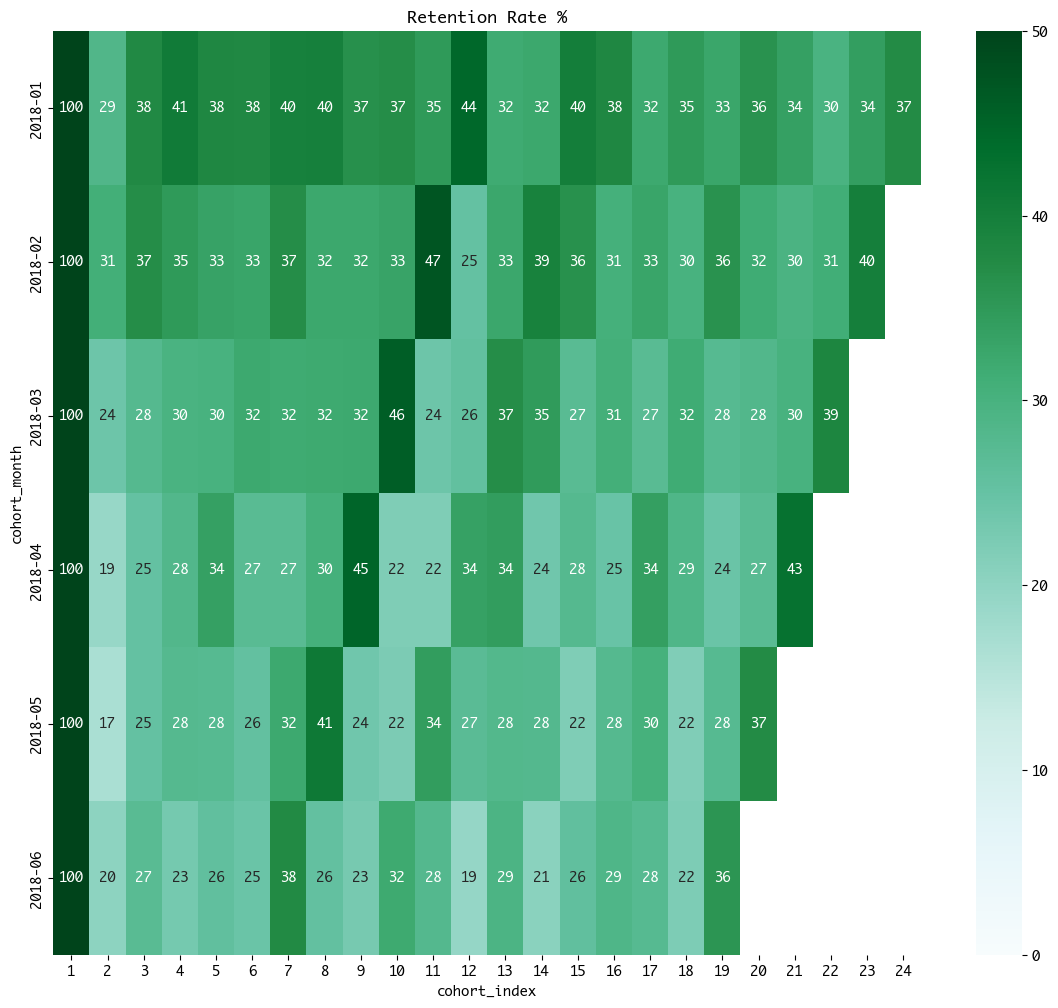

In [348]:
retention = heatmap_retention(loyal_cus_1819)

In [349]:
churn = 100 - retention
churn

cohort_index,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
cohort_month,,,,,,,,,,,,,,,,,,,,,
2018-01,0.0,71.4,62.3,59.3,61.9,62.0,60.4,60.2,63.3,63.0,...,59.9,61.9,67.9,65.1,67.3,63.8,66.4,70.2,66.0,62.6
2018-02,0.0,69.1,63.0,65.2,66.7,67.1,62.9,67.7,67.6,66.9,...,63.5,69.4,67.1,70.0,63.8,68.5,70.5,68.9,60.1,NaN
2018-03,0.0,75.9,72.2,70.3,70.1,67.8,68.2,68.1,67.9,54.1,...,72.7,69.2,72.7,68.4,72.4,71.6,70.0,61.4,NaN,NaN
2018-04,0.0,81.0,74.8,71.5,66.4,72.8,72.7,69.5,55.1,78.0,...,72.2,75.3,66.1,71.1,75.5,72.8,57.3,NaN,NaN,NaN
2018-05,0.0,83.3,74.7,72.2,72.4,74.5,67.9,58.9,76.3,77.6,...,78.0,72.2,69.6,78.2,72.4,62.6,NaN,NaN,NaN,NaN
2018-06,0.0,79.8,72.8,76.8,74.2,75.4,62.5,74.5,77.0,68.1,...,74.2,71.1,72.3,77.9,64.4,NaN,NaN,NaN,NaN,NaN


In [350]:
snapshot_date = max(loyal_cus_1819['sale_date']+datetime.timedelta(days=1))
snapshot_date

Timestamp('2020-01-01 00:00:00')

In [351]:
rfm_data = loyal_cus_1819.groupby('member_code').agg({
    'sale_date':'count',
    'value':'sum'
})
rfm_data.rename(columns={'sale_date':'Frequency', 'value':'MonetaryValue'}, inplace=True)

rfm_data['Recency'] = loyal_cus_1819.groupby('member_code')['sale_date'].apply(lambda x:(snapshot_date-x.max()).days)

rfm_data.head()

,Frequency,MonetaryValue,Recency
member_code,,,
10000648,88,90767.25,16
10000757,21,17713.00,17
10000776,21,16429.00,30
10000795,27,10031.00,165
10000809,8,2462.00,134


In [352]:
r_quartiles =  pd.qcut(rfm_data['Recency'], 4, labels=range(4,0,-1))
f_quartiles =  pd.qcut(rfm_data['Frequency'], 4, labels=range(1,5))
m_quartiles =  pd.qcut(rfm_data['MonetaryValue'], 4, labels=range(1,5))
rfm_data = rfm_data.assign(R = r_quartiles)
rfm_data = rfm_data.assign(F = f_quartiles)
rfm_data = rfm_data.assign(M = m_quartiles)

rfm_data.head()

,Frequency,MonetaryValue,Recency,R,F,M
member_code,,,,,,
10000648,88,90767.25,16,4,4,4
10000757,21,17713.00,17,4,2,2
10000776,21,16429.00,30,3,2,2
10000795,27,10031.00,165,1,3,1
10000809,8,2462.00,134,1,1,1


In [353]:
def join_rfm(x): return str(int(x['R']))+str(int(x['F']))+str(int(x['M']))

rfm_data['Segment'] = rfm_data.apply(join_rfm, axis=1)
rfm_data['rfm_Score'] = rfm_data[['R','F','M']].sum(axis=1)
rfm_data.head()

,Frequency,MonetaryValue,Recency,R,F,M,Segment,rfm_Score
member_code,,,,,,,,
10000648,88,90767.25,16,4,4,4,444,12
10000757,21,17713.00,17,4,2,2,422,8
10000776,21,16429.00,30,3,2,2,322,7
10000795,27,10031.00,165,1,3,1,131,5
10000809,8,2462.00,134,1,1,1,111,3


In [354]:
rfm_data.groupby('Segment').size().sort_values(ascending=False)[:10]

Segment
444    498
111    483
344    328
211    301
433    186
122    177
121    175
112    172
212    172
333    166
dtype: int64

In [355]:
rfm_data[rfm_data['Segment']=='111'][:5]

,Frequency,MonetaryValue,Recency,R,F,M,Segment,rfm_Score
member_code,,,,,,,,
10000809,8,2462.0,134,1,1,1,111,3
10001943,7,2805.0,436,1,1,1,111,3
10002876,7,4684.0,215,1,1,1,111,3
10003423,7,3608.0,221,1,1,1,111,3
10003526,9,3339.0,222,1,1,1,111,3


In [356]:
loyal_cus_1819[loyal_cus_1819['member_code']==10000809]

,sale_date,member_code,product_code,product_color,product_name_x,quantity,price,category_name,age,value,member_part,shop_part,member_year,sale_month,sale_year,Status,cohort_month,cohort_index,n_nunique,loyal
235936,2019-02-20,10000809,2703,3,Tellme สปอร์ต ซันฯ ทูเวย์ รีฟิล,1,355.0,แป้งทู-เวย์,55,355.0,C,C,15,2019-02,2019,Normal,2018-01,14,6,1
235937,2019-02-20,10000809,4012,NB,COVER ART อายบราว เพ็นซิล,1,179.0,ผลิตภัณฑ์แต่งหน้า,55,179.0,C,C,15,2019-02,2019,Normal,2018-01,14,6,1
271095,2018-01-24,10000809,9825,B033,Tellme ยาทาเล็บ,1,89.0,อื่นๆ,55,89.0,C,C,15,2018-01,2018,Normal,2018-01,1,6,1
316133,2018-07-04,10000809,2703,3,Tellme สปอร์ต ซันฯ ทูเวย์ รีฟิล,2,355.0,แป้งทู-เวย์,55,710.0,C,C,15,2018-07,2018,Normal,2018-01,7,6,1
322167,2018-04-09,10000809,2703,3,Tellme สปอร์ต ซันฯ ทูเวย์ รีฟิล,1,355.0,แป้งทู-เวย์,55,355.0,C,C,15,2018-04,2018,Normal,2018-01,4,6,1
322168,2018-04-09,10000809,6242,,Tellme สปองค์ อี,1,64.0,อื่นๆ,55,64.0,C,C,15,2018-04,2018,Normal,2018-01,4,6,1
405106,2018-10-16,10000809,2703,3,Tellme สปอร์ต ซันฯ ทูเวย์ รีฟิล,1,355.0,แป้งทู-เวย์,55,355.0,C,C,15,2018-10,2018,Normal,2018-01,10,6,1
478819,2019-08-20,10000809,2703,3,Tellme สปอร์ต ซันฯ ทูเวย์ รีฟิล,1,355.0,แป้งทู-เวย์,55,355.0,C,C,15,2019-08,2019,Normal,2018-01,20,6,1


In [357]:
rfm_data.groupby('rfm_Score').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count']
}).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
rfm_Score                                      
3           238.3      10.0        6210.5   483
4           163.1      13.1        9122.8   648
5           126.3      15.4       12597.7   747
6            99.7      18.2       15766.7   727
7            73.7      22.4       19558.5   717
8            65.6      27.3       25213.0   702
9            46.2      33.1       31958.5   684
10           30.8      41.1       41810.8   690
11           19.2      52.6       53915.3   635
12            7.1      65.0       67388.8   498

In [358]:
def segment_label(df):
    if df['rfm_Score'] >=9:
        return 'Gold'
    elif df['rfm_Score'] >=5:
        return 'Silver'
    else:
        return 'Bronze'

rfm_data['Segment_label'] = rfm_data.apply(segment_label, axis=1)
rfm_data.groupby('Segment_label').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count']
}).round(1)

Recency Frequency MonetaryValue      
                 mean      mean          mean count
Segment_label                                      
Bronze          195.2      11.8        7879.1  1131
Gold             27.3      46.6       47269.6  2507
Silver           91.9      20.7       18180.4  2893

In [359]:
rfm_data_seg = rfm_data[['Recency','Frequency','MonetaryValue']].copy()
rfm_data_seg.head()

,Recency,Frequency,MonetaryValue
member_code,,,
10000648,16,88,90767.25
10000757,17,21,17713.00
10000776,30,21,16429.00
10000795,165,27,10031.00
10000809,134,8,2462.00


In [360]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats


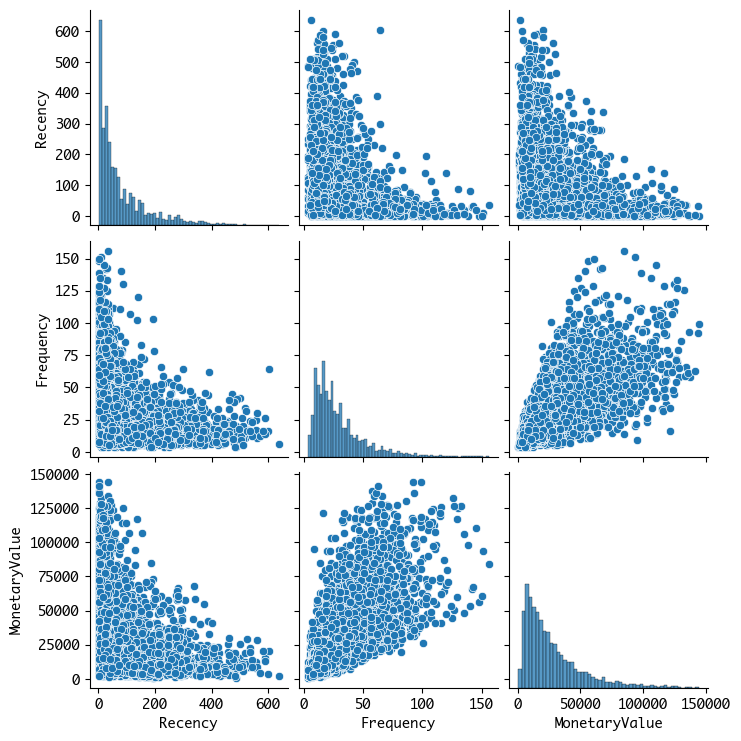

In [361]:
sns.pairplot(rfm_data_seg)

/Users/natapollimpananuwat/miniforge3/envs/dsci3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


/Users/natapollimpananuwat/miniforge3/envs/dsci3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


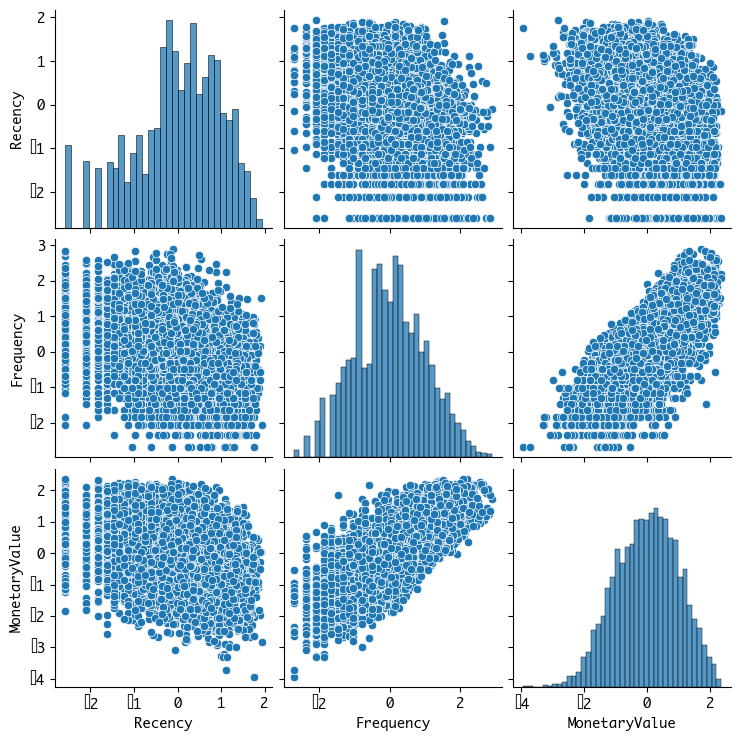

In [362]:
rfm_data_seg_log = np.log(rfm_data_seg)
scaler = StandardScaler()
rfm_data_seg_scale = scaler.fit_transform(rfm_data_seg_log)

df_rfm_data_seg_scale = pd.DataFrame(rfm_data_seg_scale, index=rfm_data_seg.index, columns=rfm_data_seg.columns)
sns.pairplot(df_rfm_data_seg_scale)

<AxesSubplot:>

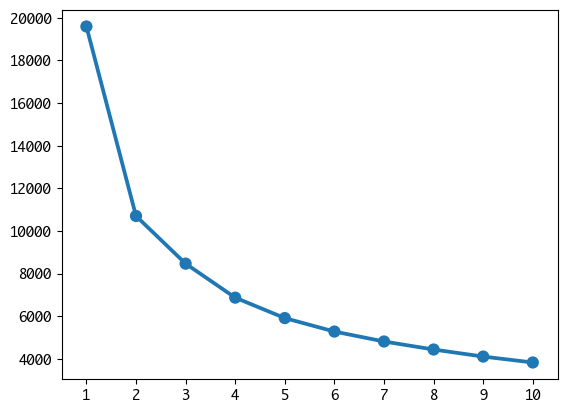

In [363]:
sse={}
for i in range(1,11):
    kmean = KMeans(n_clusters=i, random_state=1)
    kmean.fit(rfm_data_seg_scale)
    sse[i] = kmean.inertia_

sns.pointplot(x=list(sse.keys()), y=list(sse.values()))


In [364]:
kmeans = KMeans(n_clusters=3, random_state=1)

kmeans.fit_transform(rfm_data_seg_scale)

rfm_data = rfm_data.assign(Cluster = kmeans.labels_)
rfm_data.head()

,Frequency,MonetaryValue,Recency,R,F,M,Segment,rfm_Score,Segment_label,Cluster
member_code,,,,,,,,,,
10000648,88,90767.25,16,4,4,4,444,12,Gold,0
10000757,21,17713.00,17,4,2,2,422,8,Silver,2
10000776,21,16429.00,30,3,2,2,322,7,Silver,2
10000795,27,10031.00,165,1,3,1,131,5,Silver,2
10000809,8,2462.00,134,1,1,1,111,3,Bronze,1


In [365]:
rfm_data.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count']
}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          15.5      49.4       49957.4  1890
1         134.9      12.9        9152.6  2125
2          95.0      27.5       26289.0  2516

In [366]:
df_rfm_data_seg_scale['Cluster'] = rfm_data['Cluster']
df_rfm_data_seg_scale.head()

,Recency,Frequency,MonetaryValue,Cluster
member_code,,,,
10000648,-0.642664,2.011499,1.808620,0
10000757,-0.600042,-0.169252,-0.132308,2
10000776,-0.200724,-0.169252,-0.221694,2
10000795,0.997788,0.213250,-0.807735,2
10000809,0.851481,-1.638110,-2.476299,1


<AxesSubplot:title={'center':'Snake Plot of Scaled RFM from KMeans'}, xlabel='Attribute', ylabel='Value'>

/Users/natapollimpananuwat/miniforge3/envs/dsci3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


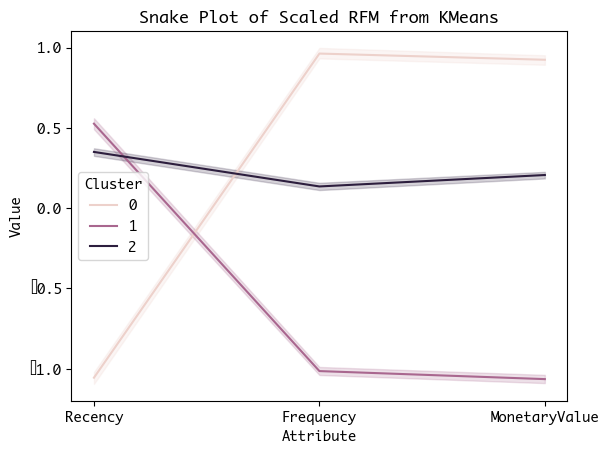

In [367]:
rfm_data_melt = pd.melt(df_rfm_data_seg_scale.reset_index(),
    id_vars=['member_code','Cluster'],
    value_vars = ['Recency','Frequency','MonetaryValue'],
    var_name='Attribute',
    value_name='Value')

plt.title('Snake Plot of Scaled RFM from KMeans')
sns.lineplot(data=rfm_data_melt, x='Attribute',y='Value',hue='Cluster')

In [368]:
df_rfm_data_seg_scale['Segment'] = rfm_data['Segment_label']
df_rfm_data_seg_scale

,Recency,Frequency,MonetaryValue,Cluster,Segment
member_code,,,,,
10000648,-0.642664,2.011499,1.808620,0,Gold
10000757,-0.600042,-0.169252,-0.132308,2,Silver
10000776,-0.200724,-0.169252,-0.221694,2,Silver
10000795,0.997788,0.213250,-0.807735,2,Silver
10000809,0.851481,-1.638110,-2.476299,1,Bronze
...,...,...,...,...,...
8816129491,1.173999,-1.638110,-1.917770,1,Bronze
8817116775,0.144205,-0.490865,-1.052366,1,Silver
8819000005,-2.104602,1.428583,1.539091,0,Gold


<AxesSubplot:title={'center':'Snake Plot of Scaled RFM from RFM Score'}, xlabel='Attribute', ylabel='Value'>

/Users/natapollimpananuwat/miniforge3/envs/dsci3.9/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


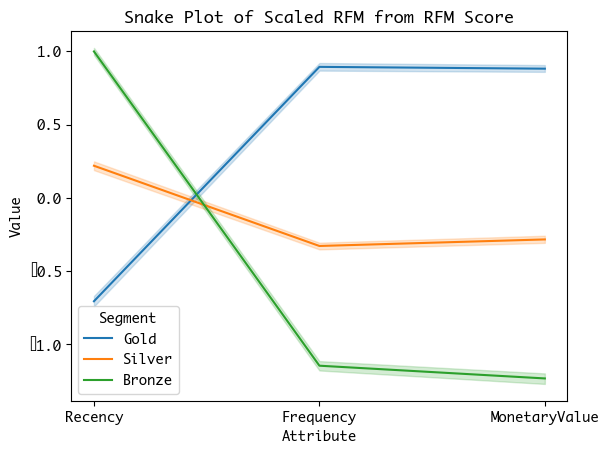

In [369]:
rfm_data_melt = pd.melt(df_rfm_data_seg_scale.reset_index(),
    id_vars=['member_code','Segment'],
    value_vars = ['Recency','Frequency','MonetaryValue'],
    var_name='Attribute',
    value_name='Value')

plt.title('Snake Plot of Scaled RFM from RFM Score')
sns.lineplot(data=rfm_data_melt, x='Attribute',y='Value',hue='Segment')

In [370]:
Segment_label = rfm_data['Segment_label']
Segment_label

member_code
10000648        Gold
10000757      Silver
10000776      Silver
10000795      Silver
10000809      Bronze
               ...  
8816129491    Bronze
8817116775    Silver
8819000005      Gold
8824117582      Gold
8824131621    Bronze
Name: Segment_label, Length: 6531, dtype: object

In [371]:
loyal_cus_1819 = loyal_cus_1819.merge(Segment_label, how='inner',left_on='member_code',right_index=True)
loyal_cus_1819

,sale_date,member_code,product_code,product_color,product_name_x,quantity,price,category_name,age,value,...,shop_part,member_year,sale_month,sale_year,Status,cohort_month,cohort_index,n_nunique,loyal,Segment_label
19,2019-11-24,10075178,9618,7,Tellme สมูธแอสซิลค์ ทูเวย์(รีฟิลพร้อมสปองค์),1,1450.0,แป้งทู-เวย์,64,1450.0,...,S,10,2019-11,2019,Normal,2018-02,22,4,1,Silver
20,2019-11-24,10075178,9618P899,7,Tellme สมูธแอสซิลค์ ทูเวย์(รีฟิลพร้อมสปองค์),1,899.0,แป้งทู-เวย์,64,899.0,...,S,10,2019-11,2019,Normal,2018-02,22,4,1,Silver
356563,2018-02-28,10075178,7056,,Tellme ยูนีโซม อีมัลชั่น,1,2490.0,ครีมบำรุง,64,2490.0,...,S,10,2018-02,2018,Normal,2018-02,1,4,1,Silver
356564,2018-02-28,10075178,7062,,Tellme ยูนีโซม ไนท์ ครีม,1,2490.0,ครีมบำรุง,64,2490.0,...,S,10,2018-02,2018,Normal,2018-02,1,4,1,Silver
356565,2018-02-28,10075178,9620,7,Aging Solution 2-way cake refill,1,1590.0,แป้งทู-เวย์,64,1590.0,...,S,10,2018-02,2018,Normal,2018-02,1,4,1,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487848,2019-08-12,10098156,A36082N1,,SUNWAY ซันสกรีน ครีม,1,228.0,ครีมกันแดด,51,228.0,...,C,4,2019-08,2019,Normal,2018-05,16,4,1,Silver
487849,2019-08-12,10098156,A38501KB,2,SUNWAY เพอร์เฟ็คฯ ทูเวย์,1,199.0,แป้งทู-เวย์,51,199.0,...,C,4,2019-08,2019,Normal,2018-05,16,4,1,Silver
522956,2019-10-23,10098156,2703,1,Tellme สปอร์ต ซันฯ ทูเวย์ รีฟิล,2,355.0,แป้งทู-เวย์,51,710.0,...,C,4,2019-10,2019,Normal,2018-05,18,4,1,Silver
522957,2019-10-23,10098156,2703,4,Tellme สปอร์ต ซันฯ ทูเวย์ รีฟิล,4,355.0,แป้งทู-เวย์,51,1420.0,...,C,4,2019-10,2019,Normal,2018-05,18,4,1,Silver


In [372]:
gold_cus_1819 = loyal_cus_1819[loyal_cus_1819['Segment_label']=='Gold'].copy()
silver_cus_1819 = loyal_cus_1819[loyal_cus_1819['Segment_label']=='Silver'].copy()
bronze_cus_1819 = loyal_cus_1819[loyal_cus_1819['Segment_label']=='Bronze'].copy()
gold_cus_1819

,sale_date,member_code,product_code,product_color,product_name_x,quantity,price,category_name,age,value,...,shop_part,member_year,sale_month,sale_year,Status,cohort_month,cohort_index,n_nunique,loyal,Segment_label
21,2019-11-22,3008106804,1134,,Tellme มอยส์เจอร์แบงค์ เซพารา โลชั่น,1,1590.0,โลชั่น,67,1590.0,...,N,19,2019-11,2019,Normal,2018-01,23,5,1,Gold
22,2019-11-22,3008106804,4001,,COVER ART คลีนพัฟ,1,105.0,อื่นๆ,67,105.0,...,N,19,2019-11,2019,Normal,2018-01,23,5,1,Gold
23,2019-11-22,3008106804,9006,,Tellme โคลาเกน วิท เอสเซ้นซ์ ออฟ ซิลค์,1,3810.0,ครีมบำรุง,67,3810.0,...,N,19,2019-11,2019,Normal,2018-01,23,5,1,Gold
24,2019-11-22,3008106804,9551N,011,Tellme อายเชโดว์ รีฟิล,1,140.0,ผลิตภัณฑ์แต่งหน้า,67,140.0,...,N,19,2019-11,2019,Normal,2018-01,23,5,1,Gold
25,2019-11-22,3008106804,9551N,038,Tellme อายเชโดว์ รีฟิล,1,140.0,ผลิตภัณฑ์แต่งหน้า,67,140.0,...,N,19,2019-11,2019,Normal,2018-01,23,5,1,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438537,2019-12-22,10036295,9802,,Tellme คิวคัมเบอร์ โฟม,1,182.0,ทำความสะอาดผิว,67,182.0,...,C,13,2019-12,2019,Normal,2018-03,22,7,1,Gold
441615,2019-04-30,10036295,9786P100,,Tellme สมูธแอสซิลค์ ซันโพรเท็คชั่น ครีม,1,1000.0,ครีมกันแดด,67,1000.0,...,C,13,2019-04,2019,Normal,2018-03,14,7,1,Gold
499583,2019-10-31,10036295,6516AA,,Tellme ยูวีไวท์ฯ ทูเวย์ เคส,1,300.0,ตลับเปล่า(เคส),67,300.0,...,C,13,2019-10,2019,Normal,2018-03,20,7,1,Gold
499584,2019-10-31,10036295,6517,3,Tellme ยูวีไวท์ฯ ทูเวย์(รีฟิลพร้อมสปองค์),1,900.0,แป้งทู-เวย์,67,900.0,...,C,13,2019-10,2019,Normal,2018-03,20,7,1,Gold


In [373]:
print('Number of gold customer :',gold_cus_1819['member_code'].nunique())

Number of gold customer : 2507


<AxesSubplot:title={'center':'Top 3 sales Bronze'}>

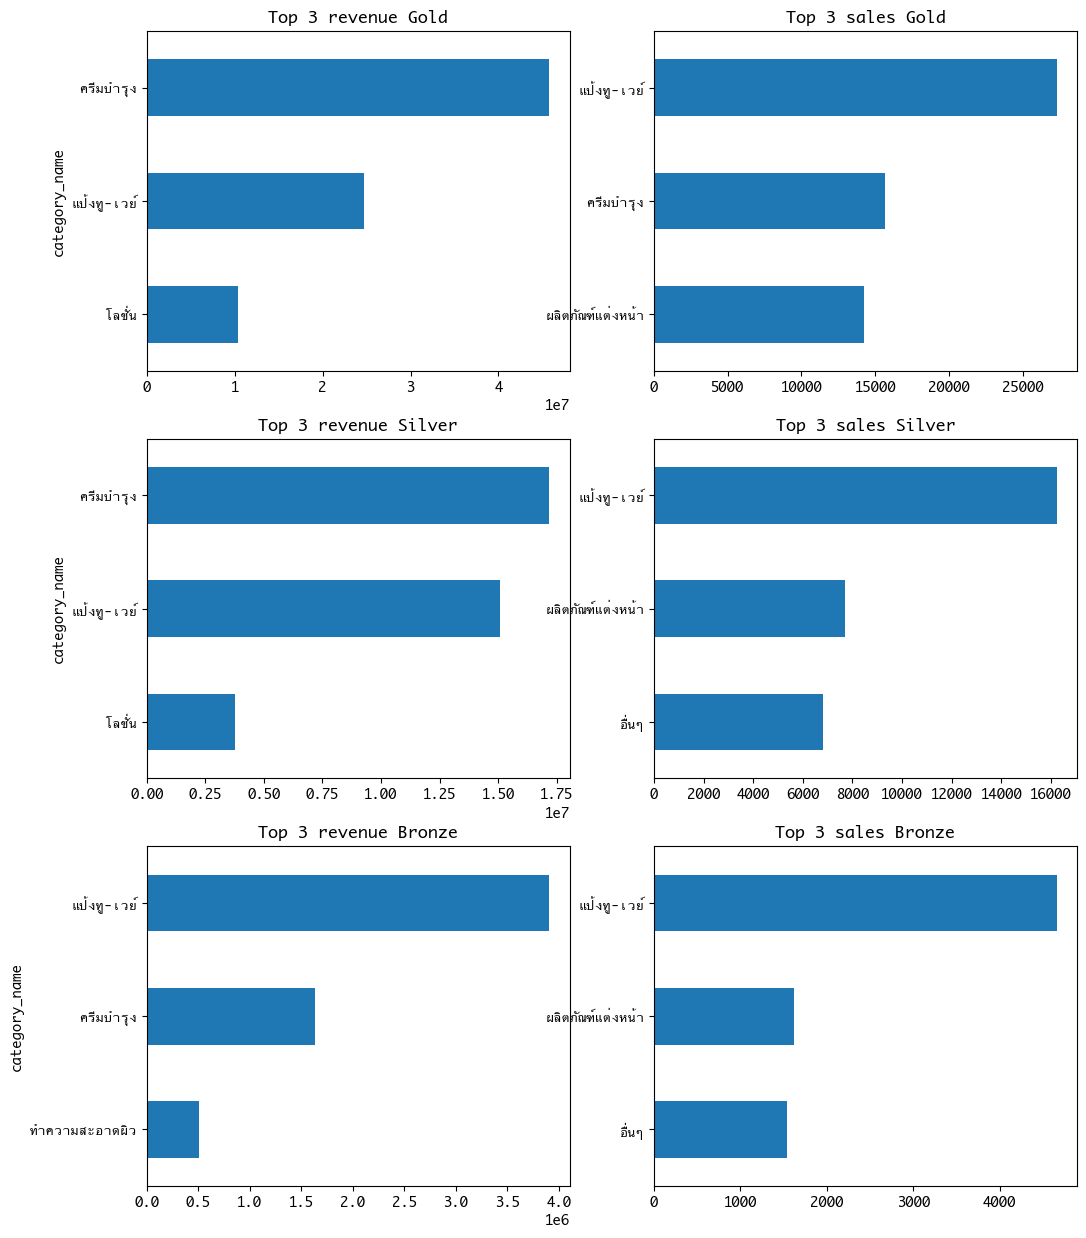

In [374]:
#plot เทียบกันใน 2 subplot ไปเลย

plt.figure(figsize=(12,15))
plt.subplot(3,2,1)
plt.title('Top 3 revenue Gold')
gold_cus_1819.groupby(['category_name'])['value'].sum().sort_values()[-3:].plot.barh()
plt.subplot(3,2,2)
plt.title('Top 3 sales Gold')
gold_cus_1819['category_name'].value_counts().sort_values()[-3:].plot.barh()

plt.subplot(3,2,3)
plt.title('Top 3 revenue Silver')
silver_cus_1819.groupby(['category_name'])['value'].sum().sort_values()[-3:].plot.barh()
plt.subplot(3,2,4)
plt.title('Top 3 sales Silver')
silver_cus_1819['category_name'].value_counts().sort_values()[-3:].plot.barh()

plt.subplot(3,2,5)
plt.title('Top 3 revenue Bronze')
bronze_cus_1819.groupby(['category_name'])['value'].sum().sort_values()[-3:].plot.barh()
plt.subplot(3,2,6)
plt.title('Top 3 sales Bronze')
bronze_cus_1819['category_name'].value_counts().sort_values()[-3:].plot.barh()

In [375]:
#loyal_cus_1819
#gold_cus_1819
quan_per_month = loyal_cus_1819.groupby(['sale_month','category_name'], as_index=False)['quantity'].sum()
quan_per_month

,sale_month,category_name,quantity
0,2018-01,ครีมกันแดด,224
1,2018-01,ครีมนวดหน้า / มาส์ค,293
2,2018-01,ครีมบำรุง,919
3,2018-01,ครีมรองพื้น,326
4,2018-01,ตลับเปล่า(เคส),249
...,...,...,...
331,2019-12,อื่นๆ,1394
332,2019-12,แป้งทู-เวย์,4824
333,2019-12,แป้งฝุ่น,250
334,2019-12,แป้งพั้ฟ,68


In [376]:
quan_pivot = quan_per_month.pivot(index='sale_month', columns='category_name',values='quantity')
quan_pivot.fillna(0, inplace=True)
quan_pivot

category_name,ครีมกันแดด,ครีมนวดหน้า / มาส์ค,ครีมบำรุง,ครีมรองพื้น,ตลับเปล่า(เคส),ทำความสะอาดผิว,ผลิตภัณฑ์ดูแลผิวเป็นพิเศษ,ผลิตภัณฑ์แต่งหน้า,ลิปสติก,อื่นๆ,แป้งทู-เวย์,แป้งฝุ่น,แป้งพั้ฟ,โลชั่น
sale_month,,,,,,,,,,,,,,
2018-01,224,293,919,326,249,903,111,1186,911,955,2603,173,36,269
2018-02,236,304,960,402,291,890,116,1142,901,1003,2922,201,37,291
2018-03,318,366,1252,478,332,1171,165,1349,978,1160,4109,218,42,372
2018-04,362,648,1317,426,328,1111,210,1337,1008,1245,3618,205,40,410
2018-05,357,633,1069,382,298,1095,146,1168,894,1182,3630,217,43,332
2018-06,366,723,1383,411,307,1207,177,1066,801,1173,3677,202,30,389
2018-07,315,313,1041,332,297,880,165,894,741,965,3278,187,48,446
2018-08,271,541,1139,393,321,1023,171,1116,780,1023,3654,204,28,500
2018-09,211,438,1020,327,265,736,125,1048,692,955,3214,176,31,295


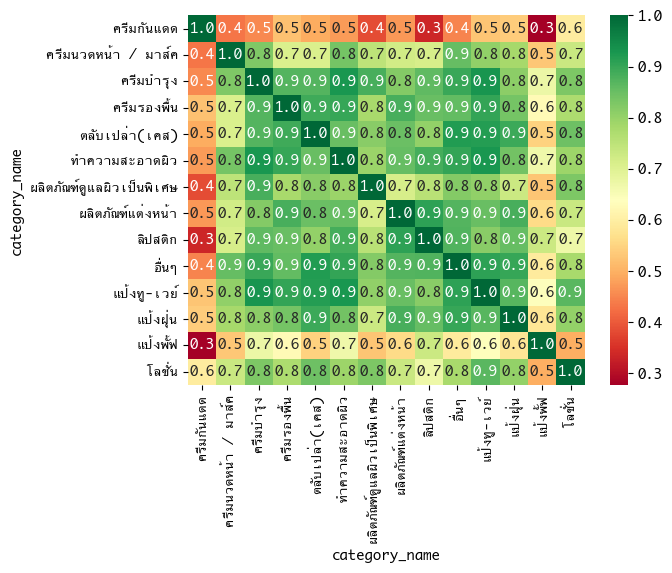

In [377]:
sns.heatmap(data = quan_pivot.corr(), annot=True, fmt='.1f', cmap='RdYlGn')
plt.show()

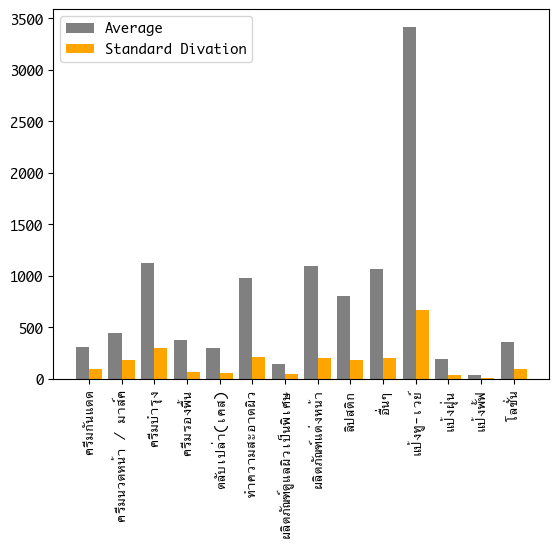

In [378]:
avg = quan_pivot.mean().values
std = quan_pivot.std().values
col_name = quan_pivot.columns
x_ix= np.arange(quan_pivot.shape[1])

plt.bar(x_ix-0.2, avg, color='grey', label='Average', width=0.4)
plt.bar(x_ix+0.2, std, color='orange', label='Standard Divation', width=0.4)
plt.xticks(x_ix, col_name, rotation=90)
plt.legend()
plt.show()

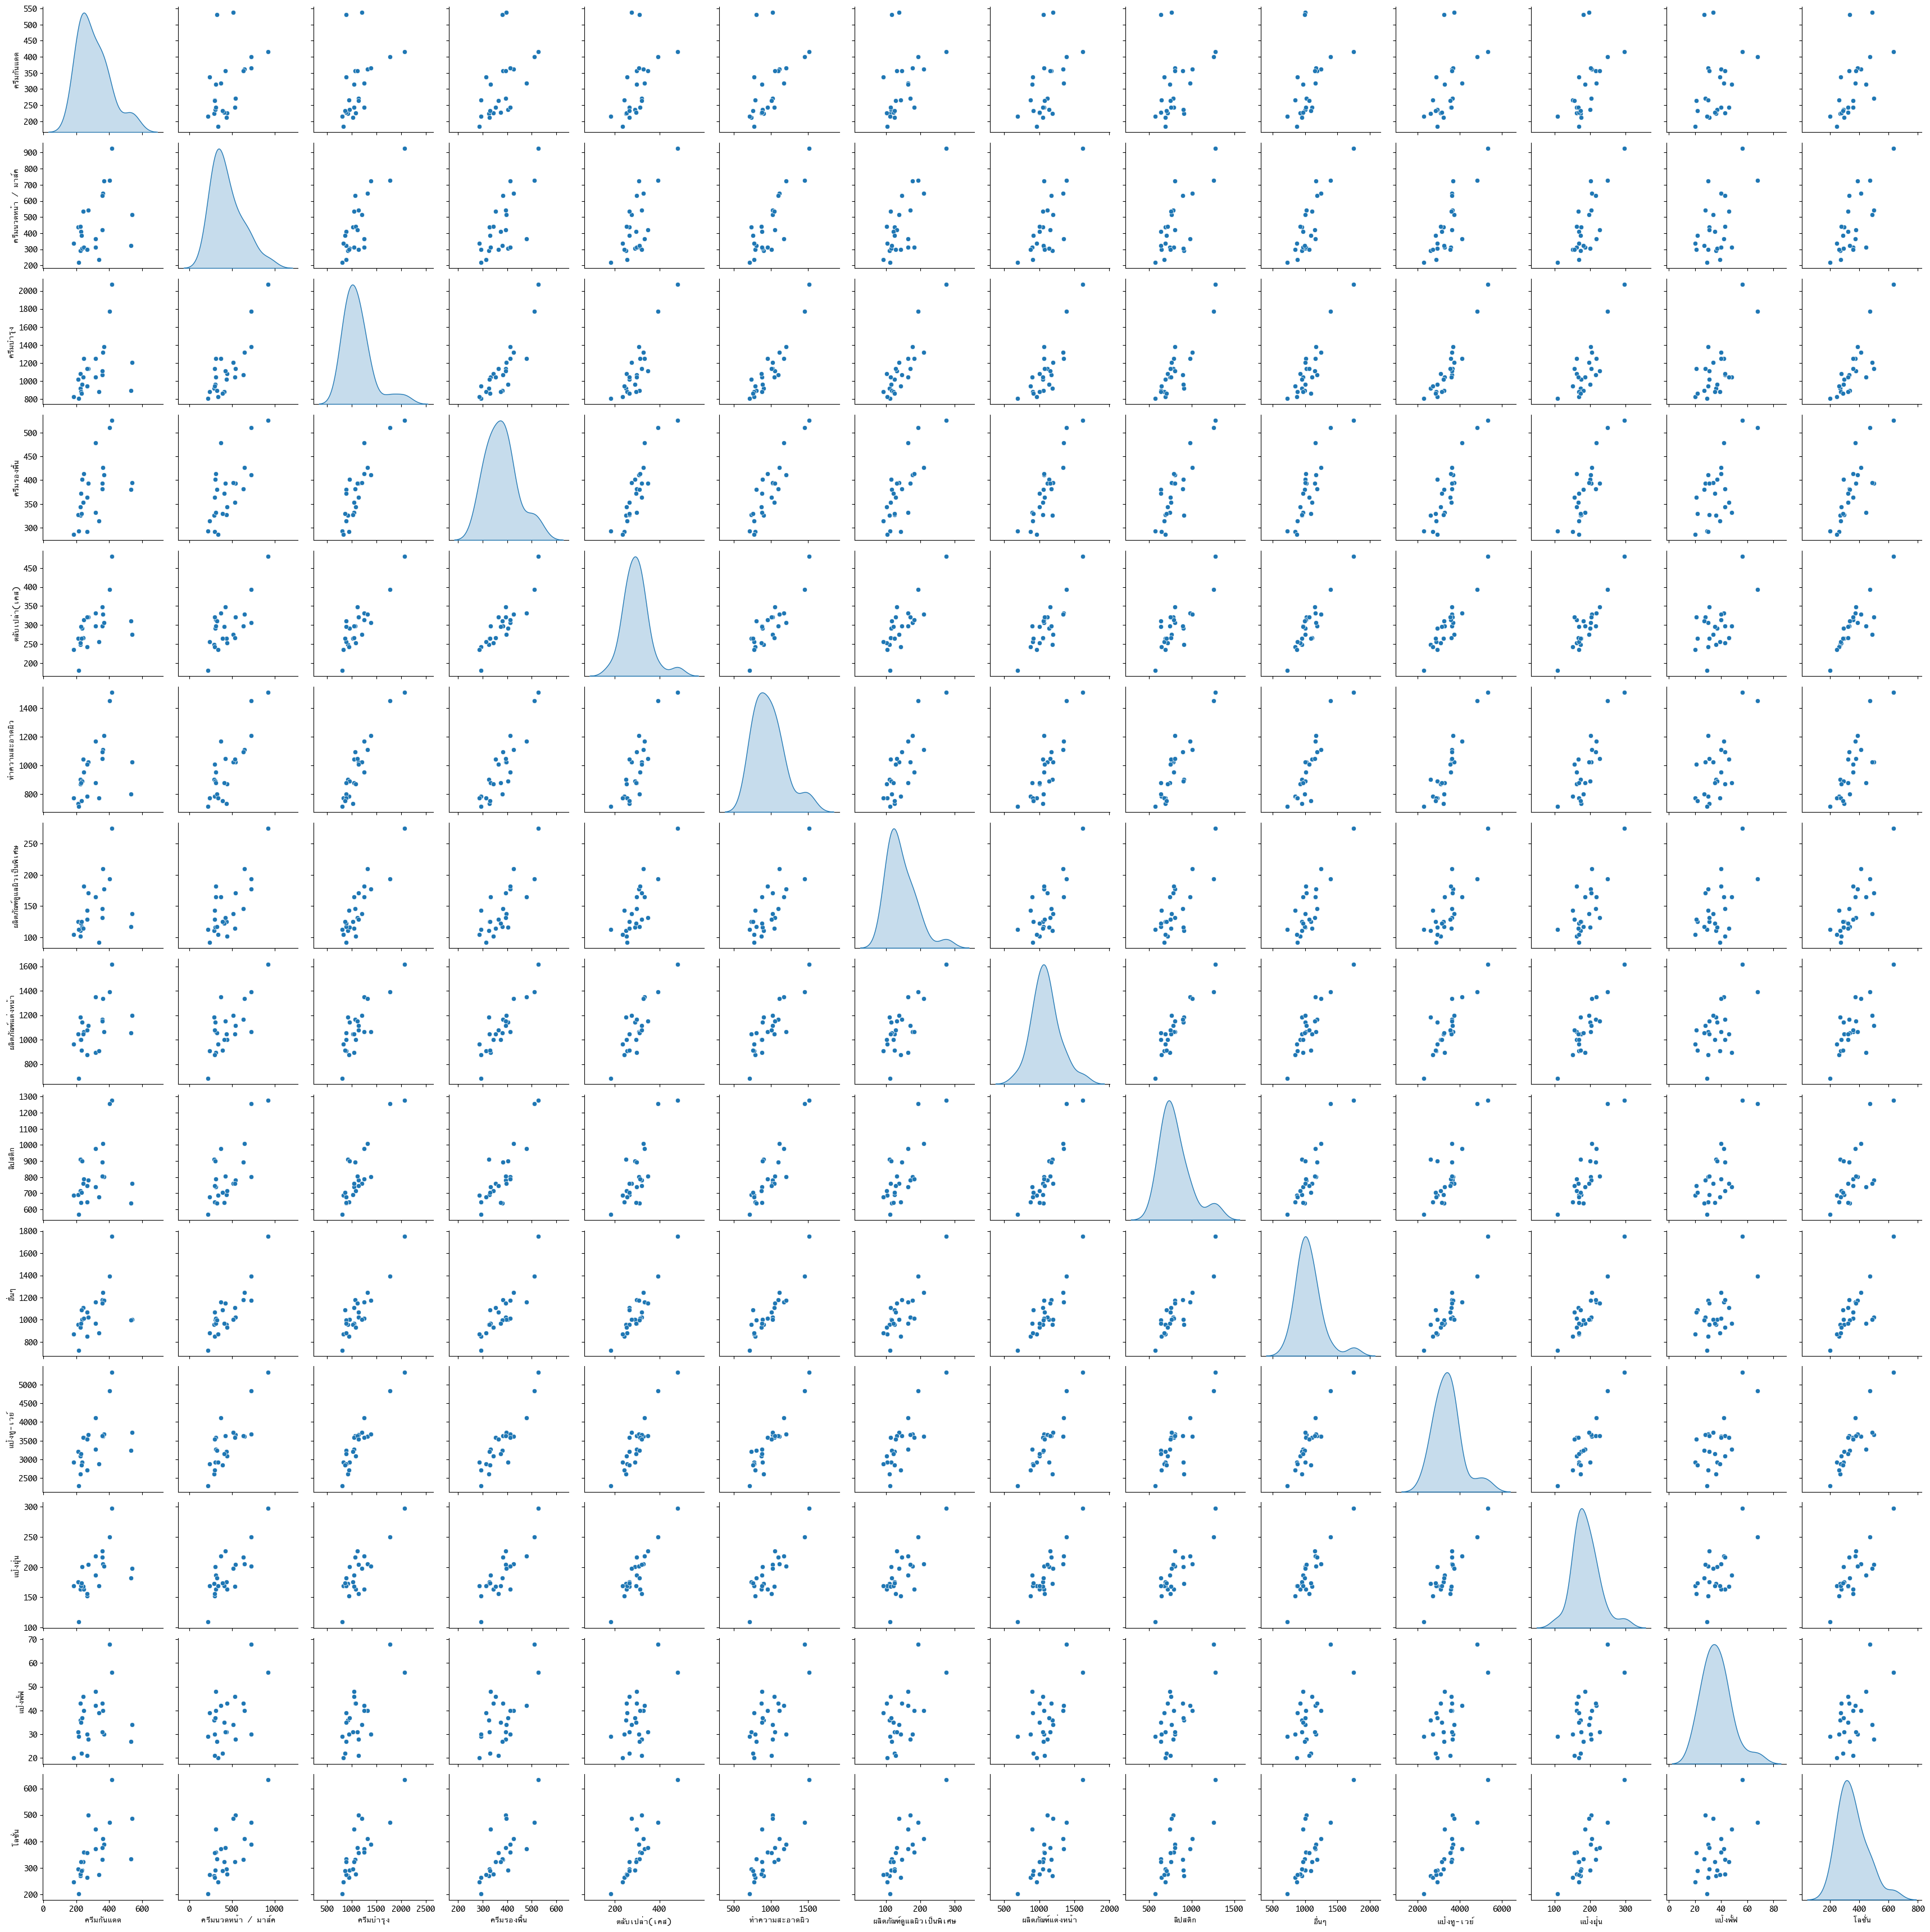

In [379]:
sns.pairplot(quan_pivot, diag_kind='kde')
plt.show()

In [380]:
scaler_cat = StandardScaler()
scaler_cat.fit(quan_pivot)

quan_pivot_scale = scaler_cat.transform(quan_pivot)
quan_pivot_scale_df = pd.DataFrame(data = quan_pivot_scale, index = quan_pivot.index, columns= quan_pivot.columns)
quan_pivot_scale_df.head()



category_name,ครีมกันแดด,ครีมนวดหน้า / มาส์ค,ครีมบำรุง,ครีมรองพื้น,ตลับเปล่า(เคส),ทำความสะอาดผิว,ผลิตภัณฑ์ดูแลผิวเป็นพิเศษ,ผลิตภัณฑ์แต่งหน้า,ลิปสติก,อื่นๆ,แป้งทู-เวย์,แป้งฝุ่น,แป้งพั้ฟ,โลชั่น
sale_month,,,,,,,,,,,,,,
2018-01,-0.870607,-0.855863,-0.691398,-0.809149,-0.832490,-0.356033,-0.814558,0.480300,0.591185,-0.526450,-1.242144,-0.430669,-0.045996,-0.893124
2018-02,-0.743136,-0.793309,-0.550073,0.403577,-0.102159,-0.419400,-0.692679,0.250903,0.534066,-0.287776,-0.756353,0.334965,0.045996,-0.663650
2018-03,0.127913,-0.440727,0.456432,1.616302,0.610782,0.950302,0.501735,1.330113,0.973884,0.492886,1.051280,0.799814,0.505959,0.181232
2018-04,0.595306,1.162951,0.680482,0.786543,0.541227,0.657839,1.598646,1.267550,1.145242,0.915538,0.303556,0.444341,0.321974,0.577597
2018-05,0.542193,1.077649,-0.174357,0.084439,0.019562,0.579849,0.038595,0.386456,0.494082,0.602278,0.321831,0.772470,0.597951,-0.235993


In [381]:
km = KMeans(n_clusters=3)
km.fit(quan_pivot_scale_df)
quan_pivot_scale_km = quan_pivot.assign(Cluster=km.labels_)

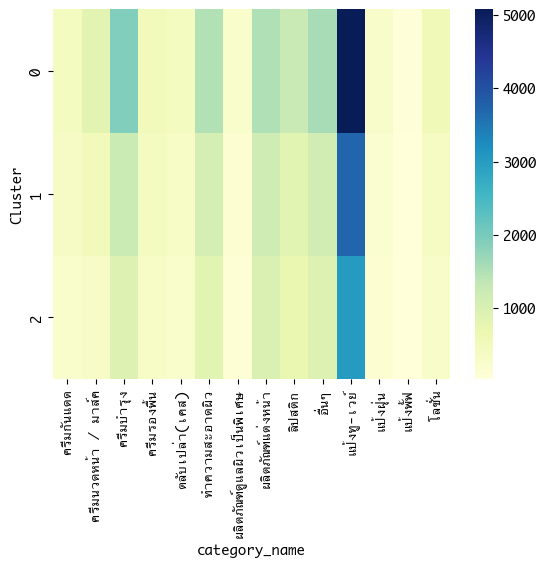

In [382]:
kmean_avg = quan_pivot_scale_km.groupby('Cluster').mean().round(0)
sns.heatmap(kmean_avg, cmap='YlGnBu')
plt.show()

In [383]:
loyal_cus_1819.sort_values(['member_code','sale_date'], inplace=True)
loyal_cus_1819.reset_index(drop=True, inplace=True)
loyal_cus_1819

,sale_date,member_code,product_code,product_color,product_name_x,quantity,price,category_name,age,value,...,shop_part,member_year,sale_month,sale_year,Status,cohort_month,cohort_index,n_nunique,loyal,Segment_label
0,2018-02-25,10000648,1513,2,Tellme ลองลาสติ้ง ทูเวย์(รีฟิลพร้อมสปองค์),1,717.0,แป้งทู-เวย์,61,717.0,...,N,15,2018-02,2018,Normal,2018-02,1,12,1,Gold
1,2018-02-25,10000648,4207,,Tellme สปองค์ วาย,2,64.0,อื่นๆ,61,128.0,...,N,15,2018-02,2018,Normal,2018-02,1,12,1,Gold
2,2018-02-25,10000648,9082,,Tellme เพิร์ล เอสเซ้นซ์ โฟมมิ่ง เคล็นเซอร์,1,1200.0,ทำความสะอาดผิว,61,1200.0,...,N,15,2018-02,2018,Normal,2018-02,1,12,1,Gold
3,2018-02-25,10000648,9764,,Tellme สมูธแอสซิลค์ อาย ครีม,1,1590.0,ผลิตภัณฑ์ดูแลผิวเป็นพิเศษ,61,1590.0,...,N,15,2018-02,2018,Normal,2018-02,1,12,1,Gold
4,2018-04-05,10000648,1134,,Tellme มอยส์เจอร์แบงค์ เซพารา โลชั่น,1,1590.0,โลชั่น,61,1590.0,...,N,15,2018-04,2018,Normal,2018-02,3,12,1,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190050,2018-12-09,8824131621,9531,1,Tellme สมูธ แวร์ ลูส เพาเดอร์,1,575.0,แป้งฝุ่น,70,575.0,...,W,16,2018-12,2018,Normal,2018-02,11,7,1,Bronze
190051,2019-02-03,8824131621,4012,CH,COVER ART อายบราว เพ็นซิล,1,179.0,ผลิตภัณฑ์แต่งหน้า,70,179.0,...,W,16,2019-02,2019,Normal,2018-02,13,7,1,Bronze
190052,2019-02-03,8824131621,7062,,Tellme ยูนีโซม ไนท์ ครีม,1,2490.0,ครีมบำรุง,70,2490.0,...,W,16,2019-02,2019,Normal,2018-02,13,7,1,Bronze
190053,2019-10-18,8824131621,7056,,Tellme ยูนีโซม อีมัลชั่น,1,2490.0,ครีมบำรุง,70,2490.0,...,W,16,2019-10,2019,Normal,2018-02,21,7,1,Bronze


In [384]:
datediff = loyal_cus_1819.groupby(['member_code'], as_index=False)['sale_date'].value_counts().set_index('member_code')
# datediff['datediff'] = datediff['sale_date'].diff()
datediff.sort_values(['member_code','sale_date'], inplace=True)
datediff['datediff'] = datediff.groupby('member_code')['sale_date'].diff().dt.days.fillna(0)
datediff.reset_index(inplace=True)
datediff.drop('count',inplace=True, axis=1)
datediff

,member_code,sale_date,datediff
0,10000648,2018-02-25,0.0
1,10000648,2018-04-05,39.0
2,10000648,2018-06-13,69.0
3,10000648,2018-08-06,54.0
4,10000648,2018-08-13,7.0
...,...,...,...
61383,8824131621,2018-06-03,78.0
61384,8824131621,2018-07-15,42.0
61385,8824131621,2018-12-09,147.0
61386,8824131621,2019-02-03,56.0


In [385]:
loyal_cus_1819 = loyal_cus_1819.merge(datediff, how='left',right_on=['member_code','sale_date'],left_on=['member_code','sale_date'])
loyal_cus_1819.head()

,sale_date,member_code,product_code,product_color,product_name_x,quantity,price,category_name,age,value,...,member_year,sale_month,sale_year,Status,cohort_month,cohort_index,n_nunique,loyal,Segment_label,datediff
0,2018-02-25,10000648,1513,2,Tellme ลองลาสติ้ง ทูเวย์(รีฟิลพร้อมสปองค์),1,717.0,แป้งทู-เวย์,61,717.0,...,15,2018-02,2018,Normal,2018-02,1,12,1,Gold,0.0
1,2018-02-25,10000648,4207,,Tellme สปองค์ วาย,2,64.0,อื่นๆ,61,128.0,...,15,2018-02,2018,Normal,2018-02,1,12,1,Gold,0.0
2,2018-02-25,10000648,9082,,Tellme เพิร์ล เอสเซ้นซ์ โฟมมิ่ง เคล็นเซอร์,1,1200.0,ทำความสะอาดผิว,61,1200.0,...,15,2018-02,2018,Normal,2018-02,1,12,1,Gold,0.0
3,2018-02-25,10000648,9764,,Tellme สมูธแอสซิลค์ อาย ครีม,1,1590.0,ผลิตภัณฑ์ดูแลผิวเป็นพิเศษ,61,1590.0,...,15,2018-02,2018,Normal,2018-02,1,12,1,Gold,0.0
4,2018-04-05,10000648,1134,,Tellme มอยส์เจอร์แบงค์ เซพารา โลชั่น,1,1590.0,โลชั่น,61,1590.0,...,15,2018-04,2018,Normal,2018-02,3,12,1,Gold,39.0


In [388]:
datediff['churn'] = (datediff.datediff>180).astype(int)
datediff.churn.value_counts()

0    57748
1     3640
Name: churn, dtype: int64

In [322]:
mem_churn = datediff[datediff.churn==1].member_code.unique()
mem_churn.shape

(2966,)

In [389]:
loyal_cus_1819['churn'] = np.where(loyal_cus_1819['member_code'].isin(mem_churn),1,0)
loyal_cus_1819

,sale_date,member_code,product_code,product_color,product_name_x,quantity,price,category_name,age,value,...,sale_month,sale_year,Status,cohort_month,cohort_index,n_nunique,loyal,Segment_label,datediff,churn
0,2018-02-25,10000648,1513,2,Tellme ลองลาสติ้ง ทูเวย์(รีฟิลพร้อมสปองค์),1,717.0,แป้งทู-เวย์,61,717.0,...,2018-02,2018,Normal,2018-02,1,12,1,Gold,0.0,0
1,2018-02-25,10000648,4207,,Tellme สปองค์ วาย,2,64.0,อื่นๆ,61,128.0,...,2018-02,2018,Normal,2018-02,1,12,1,Gold,0.0,0
2,2018-02-25,10000648,9082,,Tellme เพิร์ล เอสเซ้นซ์ โฟมมิ่ง เคล็นเซอร์,1,1200.0,ทำความสะอาดผิว,61,1200.0,...,2018-02,2018,Normal,2018-02,1,12,1,Gold,0.0,0
3,2018-02-25,10000648,9764,,Tellme สมูธแอสซิลค์ อาย ครีม,1,1590.0,ผลิตภัณฑ์ดูแลผิวเป็นพิเศษ,61,1590.0,...,2018-02,2018,Normal,2018-02,1,12,1,Gold,0.0,0
4,2018-04-05,10000648,1134,,Tellme มอยส์เจอร์แบงค์ เซพารา โลชั่น,1,1590.0,โลชั่น,61,1590.0,...,2018-04,2018,Normal,2018-02,3,12,1,Gold,39.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190050,2018-12-09,8824131621,9531,1,Tellme สมูธ แวร์ ลูส เพาเดอร์,1,575.0,แป้งฝุ่น,70,575.0,...,2018-12,2018,Normal,2018-02,11,7,1,Bronze,147.0,1
190051,2019-02-03,8824131621,4012,CH,COVER ART อายบราว เพ็นซิล,1,179.0,ผลิตภัณฑ์แต่งหน้า,70,179.0,...,2019-02,2019,Normal,2018-02,13,7,1,Bronze,56.0,1
190052,2019-02-03,8824131621,7062,,Tellme ยูนีโซม ไนท์ ครีม,1,2490.0,ครีมบำรุง,70,2490.0,...,2019-02,2019,Normal,2018-02,13,7,1,Bronze,56.0,1
190053,2019-10-18,8824131621,7056,,Tellme ยูนีโซม อีมัลชั่น,1,2490.0,ครีมบำรุง,70,2490.0,...,2019-10,2019,Normal,2018-02,21,7,1,Bronze,257.0,1


In [393]:
rfm_data['churn'] = np.where(rfm_data.index.isin(mem_churn),1,0)
rfm_data

,Frequency,MonetaryValue,Recency,R,F,M,Segment,rfm_Score,Segment_label,Cluster,churn
member_code,,,,,,,,,,,
10000648,88,90767.25,16,4,4,4,444,12,Gold,0,0
10000757,21,17713.00,17,4,2,2,422,8,Silver,2,1
10000776,21,16429.00,30,3,2,2,322,7,Silver,2,0
10000795,27,10031.00,165,1,3,1,131,5,Silver,2,1
10000809,8,2462.00,134,1,1,1,111,3,Bronze,1,1
...,...,...,...,...,...,...,...,...,...,...,...
8816129491,8,3940.00,212,1,1,1,111,3,Bronze,1,1
8817116775,17,8164.00,49,2,2,1,221,5,Silver,1,1
8819000005,60,72341.00,2,4,4,4,444,12,Gold,0,0


In [395]:
rfm_data.to_csv('rfm_data_churn.csv')
loyal_cus_1819.to_csv('loyal_cus_1819_churn.csv')